In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [48]:
df = pd.read_csv('airbnb.csv')
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [51]:
# cek bentuk data
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

# menampilkan informasi basic dari dataset
df.info()

# deskriptif analitic untuk menampilkan ringkasan dasar dari dataset
df.describe()

Dataset memiliki 15854 baris dan 17 kolom.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  in

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [53]:
import numpy as np

# fungsi untuk mendeteksi outlier dengan menggunakan metode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# cek outlier pada kolom-kolom numeric
outlier_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
outliers_dict = {column: detect_outliers_iqr(df, column) for column in outlier_columns}

# Print the number of outliers for each column
for column, outliers in outliers_dict.items():
    print(f"jumlah outlier pada kolom {column}: {len(outliers)}")


jumlah outlier pada kolom price: 1403
jumlah outlier pada kolom minimum_nights: 3168
jumlah outlier pada kolom number_of_reviews: 2240
jumlah outlier pada kolom reviews_per_month: 693
jumlah outlier pada kolom availability_365: 0


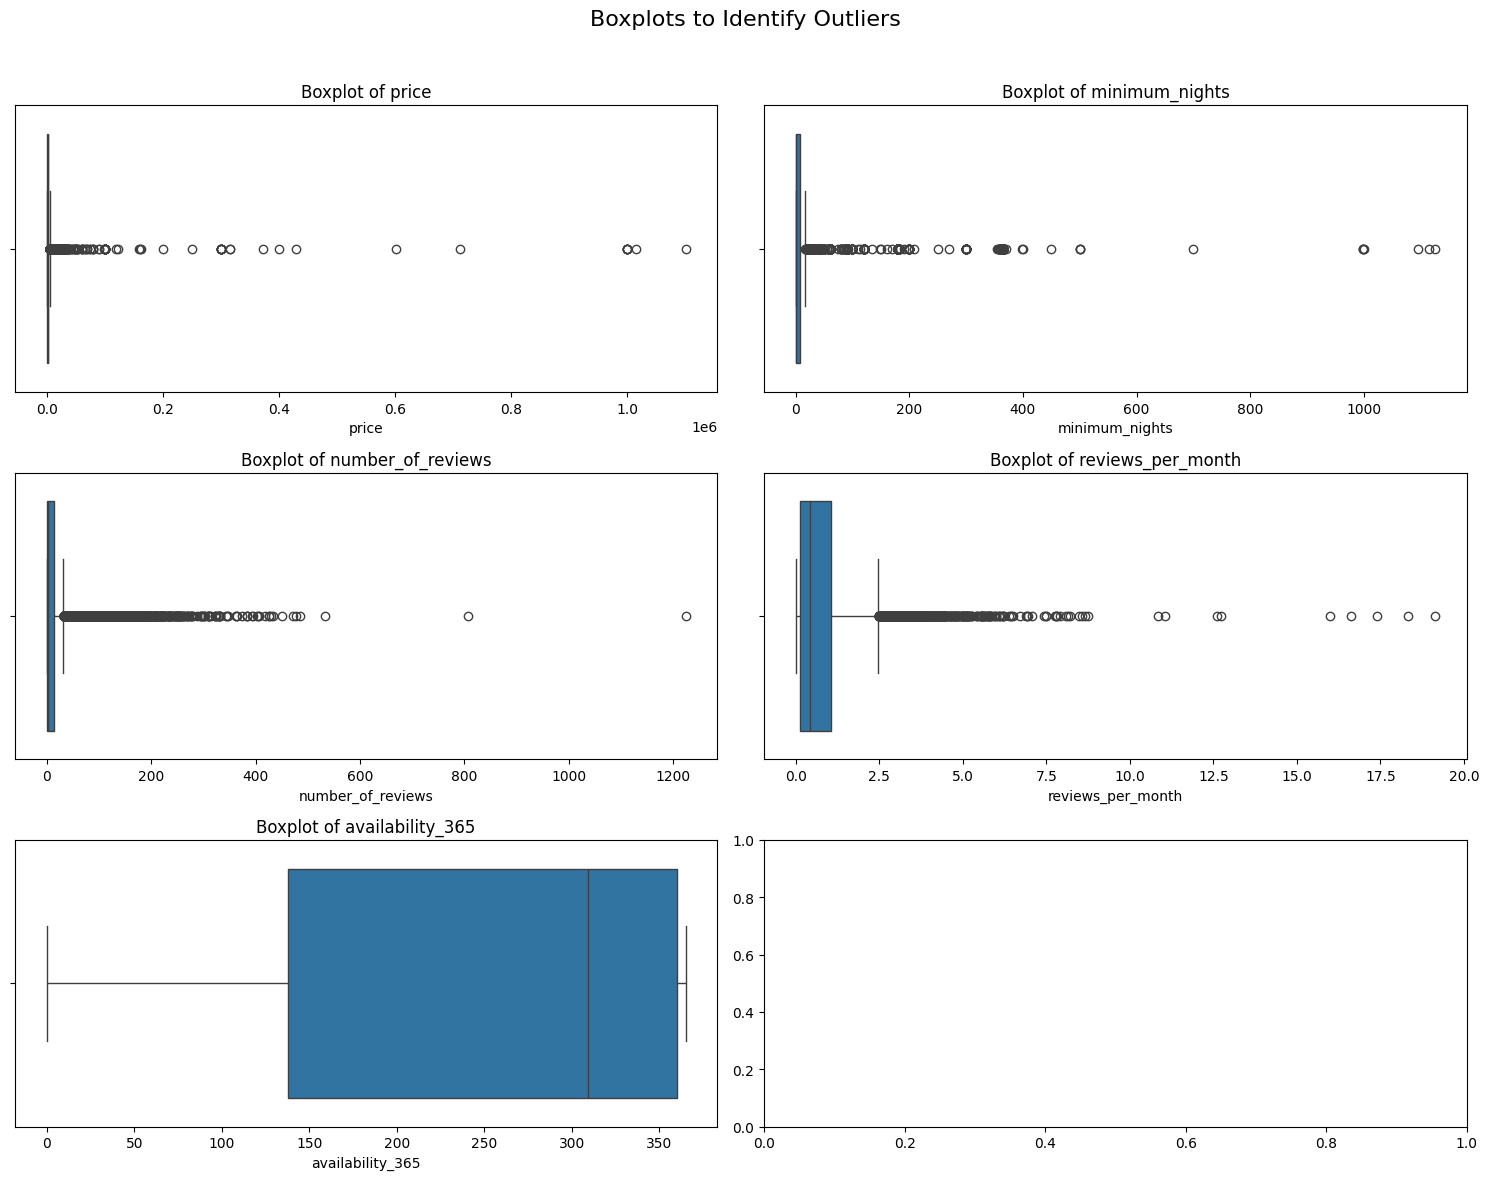

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# set up bloxplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Boxplots Outlier', fontsize=16)

# Plot boxplots pada kolom numeric
columns_to_plot = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=df, x=column, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [54]:
# cek missing values
df.isnull().sum()


Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [55]:
df.dropna(inplace=True) 

In [56]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
5,5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
6,6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0
8,8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0


In [57]:
df.isnull().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [58]:
# cek masalah format tanggal pada kolom 'last_review'
try:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    date_format_errors = df['last_review'].isnull().sum()
    print("\nJumlah error format tanggal pada kolom 'last_review':", date_format_errors)
except Exception as e:
    print("\nError in Date Conversion:", e)


Jumlah error format tanggal pada kolom 'last_review': 0


In [59]:
#cek data duplikat
duplicate_rows = df[df.duplicated()]

num_duplicates = len(duplicate_rows)
print(f"Jumlah baris duplikat: {num_duplicates}")
duplicate_rows



Jumlah baris duplikat: 0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [60]:
#mengetahui room_type yang memiliki jumlah review terbanyak

reviews_by_room_type = df.groupby('room_type')['number_of_reviews'].sum()

reviews_by_room_type_sorted = reviews_by_room_type.sort_values(ascending=False)

reviews_by_room_type_sorted


room_type
Entire home/apt    197943
Private room        50701
Hotel room          12700
Shared room          2682
Name: number_of_reviews, dtype: int64

In [61]:
# cek longitude latitude yang memiliki jumlah review paling banyak
max_reviews = df['number_of_reviews'].max()
max_reviews_location = df[df['number_of_reviews'] == max_reviews][['latitude', 'longitude', 'number_of_reviews']]

max_reviews_location

,latitude,longitude,number_of_reviews
3737,13.77369,100.54079,1224


hasil review yang didapat menunjukkan lokasi di bangkok

In [34]:
# Melakukan filter data untuk tipe kamar yang memiliki review terbanyak yaitu 'Entire home/apt'
entire_home_data = df[df['room_type'] == 'Entire home/apt']

# Menampilkan listings yang memiliki availability terbanyak dalam setahun kedepan
max_availability = entire_home_data['availability_365'].max()
max_availability_listings = entire_home_data[entire_home_data['availability_365'] == max_availability][['name', 'latitude', 'longitude', 'availability_365']]

max_availability_listings


,name,latitude,longitude,availability_365
5,NEw Pro!! Bungalow Bkk Centre,13.697570,100.528800,365
8,"Batcave, Pool view, near Chatuchak",13.816930,100.564330,365
13,budget hotel bangkok near subway,13.779410,100.573830,365
40,Self catering cozy1-bed near BTS,13.713700,100.596370,365
58,Suvarnabhumi free transfer,13.721410,100.729460,365
...,...,...,...,...
14927,Studio/monthly/拉玛九中国大使馆月租开间shuttle地铁站phraram9,13.763200,100.561250,365
15172,Good place for sleep,13.769900,100.630040,365
15419,Warm stay in community rural BKK,13.695824,100.412086,365
15563,Deluxe Design 2 Bedroom | Ekkamai,13.723670,100.585970,365


In [64]:
# membandingkan harga antara tipe kamar home/apt dan private room

from scipy.stats import ttest_ind

# Filter data for two room types
entire_home_prices = df[df['room_type'] == 'Entire home/apt']['price']
private_room_prices = df[df['room_type'] == 'Private room']['price']

# Perform a t-test to compare means
t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices, nan_policy='omit')
print("\nT-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)



T-test Results:
T-statistic: 0.7264619101677763
P-value: 0.4675737308961013
